In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

In [4]:
df = pd.read_csv('london.csv')

In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
# Поменяем тип переменной 
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:

df.shape

(17414, 10)

In [9]:
df_time_cnt = df.groupby('timestamp', as_index=False)\
.agg({'cnt':'sum'})\
.rename(columns={'timestamp':'time'})

In [10]:
df_time_cnt

,time,cnt
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47
...,...,...
17409,2017-01-03 19:00:00,1042
17410,2017-01-03 20:00:00,541
17411,2017-01-03 21:00:00,337
17412,2017-01-03 22:00:00,224


In [11]:
# Построим график числа поездок от даты 

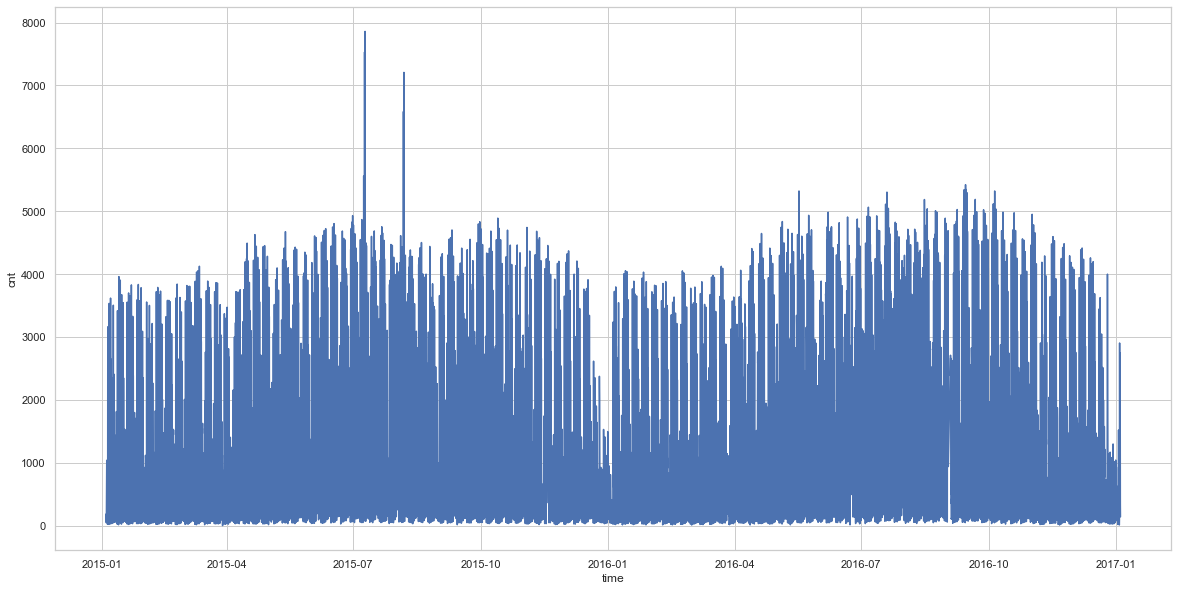

In [12]:
sns.lineplot(x='time', y='cnt', data=df_time_cnt)
None

# График получился ужасный, невозможно найти какие-либо тренды, инсайты. Преобразуем данные 

In [13]:
df_time_cnt = df_time_cnt.set_index('time')

In [15]:
df_time_cnt.head()

,cnt
time,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


In [14]:
# Преобразуем колонку 'time'
df_time_cnt = df_time_cnt.resample(rule='D').agg({'cnt':'sum'})

In [16]:
df_time_cnt.head()

,cnt
time,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


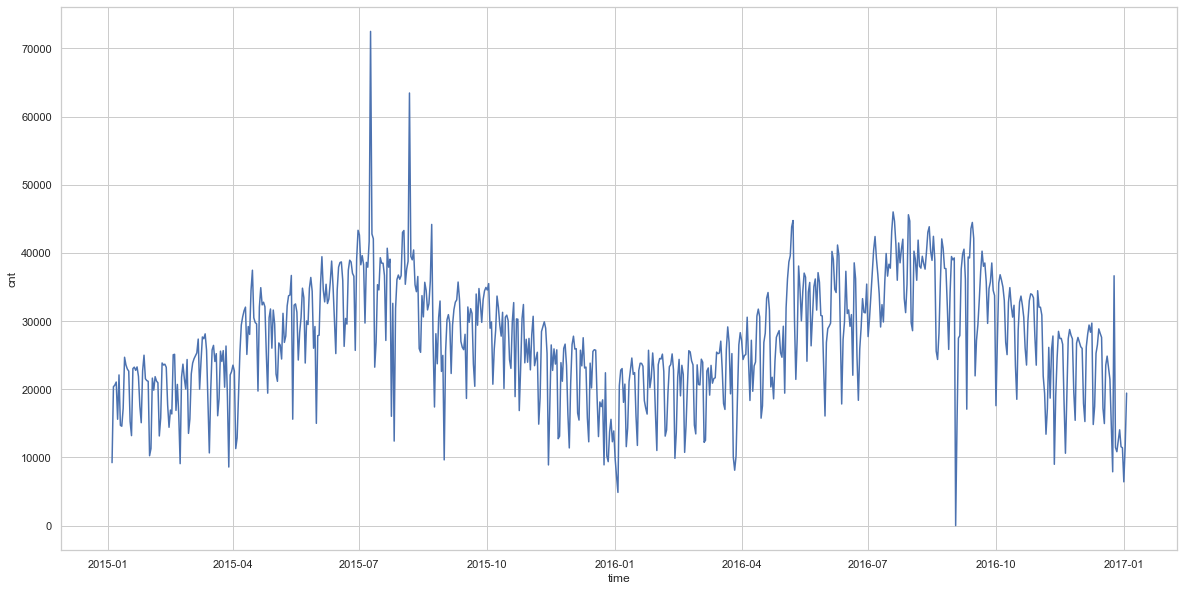

In [17]:
sns.lineplot(x='time', y='cnt', data=df_time_cnt)
None

In [18]:
# Вычислим скользящее среднее для сглаживания значений в дальнейшем 
df_time_cnt['rolling_3'] = df_time_cnt['cnt'].rolling(3).mean()

In [19]:
df_time_cnt

,cnt,rolling_3
time,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667
...,...,...
2016-12-30,11566,12682.000000
2016-12-31,11424,12347.333333
2017-01-01,6421,9803.666667


In [20]:
# Разница между наблюдаемыми данным и сглаженными 
df_time_cnt['diff'] = df_time_cnt['cnt'] - df_time_cnt['rolling_3']

In [21]:
df_time_cnt = df_time_cnt.reset_index()

In [22]:
df_time_cnt

,time,cnt,rolling_3,diff
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000
727,2016-12-31,11424,12347.333333,-923.333333
728,2017-01-01,6421,9803.666667,-3382.666667
729,2017-01-02,11823,9889.333333,1933.666667


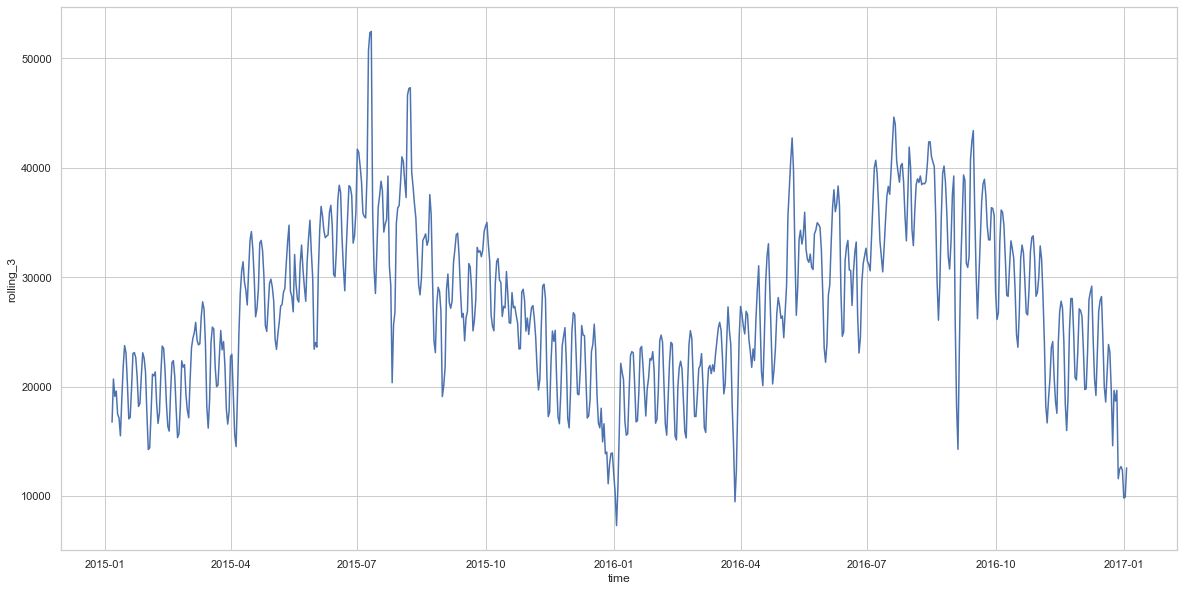

In [23]:
sns.lineplot(x=df_time_cnt['time'], y=df_time_cnt['rolling_3'])
None

In [360]:
# Определим std, доверительный интервал 

In [24]:
# std
std = np.std(df_time_cnt['diff'])


In [29]:
# Доверительный интвервал 

df_time_cnt['upper_bound'] = df_time_cnt['rolling_3'] + 2.576 * std
df_time_cnt['lower_bound'] = df_time_cnt['rolling_3'] - 2.576 * std

In [34]:
df_time_cnt['rolling_3'].mean()

27264.920438957506

In [30]:
df_time_cnt

,time,cnt,rolling_3,diff,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854


In [37]:
# Изучим аномальные всплески аренд машин 
# Для этого выведем все заказ, которые превышают 99% доверительный интервал (верхняя граница)

In [40]:
df_time_cnt[df_time_cnt['cnt'] > df_time_cnt['upper_bound']].sort_values('cnt', ascending=False)

,time,cnt,rolling_3,diff,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812


In [41]:
# Наибольшее значени 'cnt'  было 2015-07-09, согласно Google, в этот день произошла забастовка водителей, машинистов, 
#вследствие чего нагрузка на транспорт возросла

In [45]:
# Посмотри на аномальные вспелски аренд машин в меньшую сторону 

In [46]:
df_time_cnt[df_time_cnt['cnt'] < df_time_cnt['lower_bound']].sort_values('cnt', ascending=False)

,time,cnt,rolling_3,diff,upper_bound,lower_bound
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146


In [49]:
# 607 строчка - ошибка в сборе данных 

In [48]:
# 2015-11-14 - в этот день было зафиксировано наименьше значени 'cnt', согласно Google, 
#в этот день произошли ряд терактов в Париже, а также были угрозы терактов в Лондоне.